[ 0  0 -1  0  1  1 -1 -1 -1 -1 -1  2 -1  2  3  3  3  3 -1 -1 -1  4  5  5
  5  4  4  4 -1  4 -1  1  3  3  3  6  6  6  6  6  6 -1  6  6  6  6  7  7
  7  7  7  7  3  6  6  6  6  6  6]


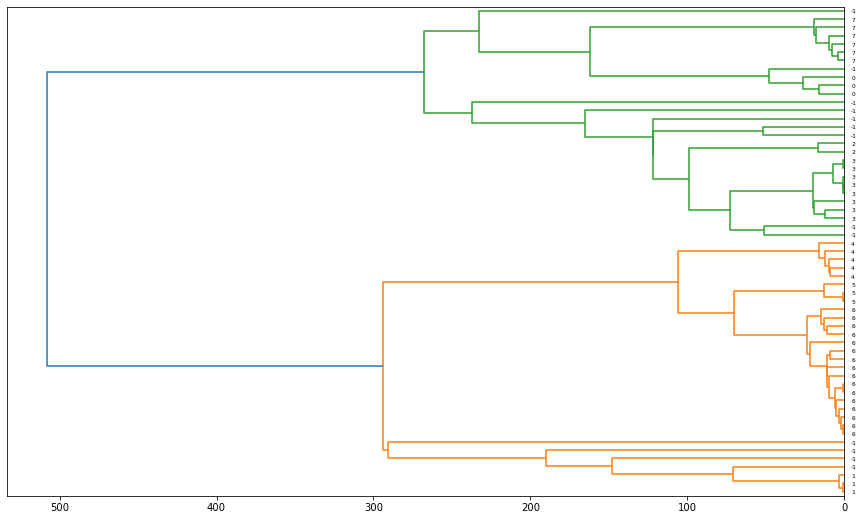

In [1]:
from pylib.tlsh_lib import *

(tlist, labelList) = tlsh_csvfile("nef.csv")
res = runDBSCAN(tlist, eps=30, min_samples=2)
print(res.labels_)
tlsh_dendrogram(tlist, labelList=res.labels_)


In [2]:
from pylib.tlsh_lib import *
import time

# (tlist, labelList) = tlsh_csvfile("dataDir/mb_10K.csv")
for size in range(1,5):
    datafile = "dataDir/mb_" + str(size) + "K.csv"
    print("reading in " + datafile)
    (tlist, labelList) = tlsh_csvfile(datafile)
    if (tlist is not None):
        resetDistCalc()
        tic = time.perf_counter()
        res = runDBSCAN(tlist, eps=30, min_samples=2, algorithm='auto')
        toc = time.perf_counter()
        nDistCalc = lookupDistCalc()
        
        outfile = "dataDir/mb_" + str(size) + "K_dbscan_out.txt"
        outputClusters(outfile, tlist, res.labels_, labelList)
        
        print(f"DBSCAN ran in {toc - tic:0.4f} seconds")
        nclusters = max(res.labels_)
        print("nclusters=", nclusters)
        print("nDistCalc=", nDistCalc)
        # print(res.labels_)
        print()
    # end if
# end for


reading in dataDir/mb_1K.csv
written  dataDir/mb_1K_dbscan_out.txt
DBSCAN ran in 0.8683 seconds
nclusters= 82
nDistCalc= 1046895

reading in dataDir/mb_2K.csv
written  dataDir/mb_2K_dbscan_out.txt
DBSCAN ran in 3.6286 seconds
nclusters= 163
nDistCalc= 4187002

reading in dataDir/mb_3K.csv
written  dataDir/mb_3K_dbscan_out.txt
DBSCAN ran in 7.4558 seconds
nclusters= 231
nDistCalc= 9257878

reading in dataDir/mb_4K.csv
written  dataDir/mb_4K_dbscan_out.txt
DBSCAN ran in 13.6460 seconds
nclusters= 285
nDistCalc= 16694273



			DBSCAN
size	time	nclust	ndist
1K	0.8863	82	1046895
2K	3.4965	163	4187002
3K	7.5469	231	9257878
4K	13.6727	285	16694273
5K	20.9427	336	25877733
6K	29.8737	391	37019158


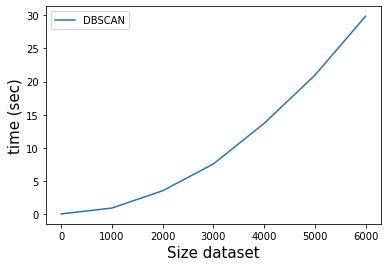

In [3]:
from pylib.tlsh_lib import *
import time

# (tlist, labelList) = tlsh_csvfile("dataDir/mb_10K.csv")

print("\t\t\tDBSCAN")
print("size\ttime\tnclust\tndist")

largeK = 7
dbs_time = [0] * (largeK)

for size in range(1, largeK):
    datafile = "dataDir/mb_" + str(size) + "K.csv"
    (tlist, labelList) = tlsh_csvfile(datafile)
    if (tlist is not None):        
        resetDistCalc()
        tic = time.perf_counter()
        dbs_res = runDBSCAN(tlist, eps=30, min_samples=2, algorithm='auto')
        toc = time.perf_counter()
        dbs_nDistCalc = lookupDistCalc()
        dbs_time[size] = toc-tic
        dtime          = f"{dbs_time[size]:0.4f}"
        dbs_nclusters = max(dbs_res.labels_)
        
        print( str(size) + "K\t" + dtime + "\t" + str(dbs_nclusters) + "\t" + str(dbs_nDistCalc)  )
    # end if
# end for

srange = [x for x in range(0, largeK*1000, 1000)]

import matplotlib.pyplot as plt
line2, = plt.plot(srange, dbs_time,  label='DBSCAN')
plt.legend(handles=[line2], loc='upper left')
plt.xlabel('Size dataset', fontsize=15)
plt.ylabel('time (sec)', fontsize=15)
plt.show()